In [95]:
# install.packages("neuralnet")
# install.packages("mltools")
# install.packages("data.table")
# install.packages("caret", dependencies = TRUE)

library(neuralnet)
library(mltools)
library(data.table)
library(caret)


In [96]:
# install.packages("NeuralNetTools")

library(NeuralNetTools)


In [97]:
iris2 <- scale(iris[, 1:4])

typeof(iris2)


[1] "double"

In [98]:
iris2 <- scale(iris[, 1:4])
iris2 <- as.data.frame(iris2)

typeof(iris2)


[1] "list"

In [99]:
iris2 <- scale(iris[, 1:4])
iris2 <- as.data.frame(iris2)

# Create a new column for the species
iris2$species <- iris$Species

head(iris2, 10)


,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,-0.8976739,1.01560199,-1.335752,-1.311052,setosa
2,-1.1392005,-0.13153881,-1.335752,-1.311052,setosa
3,-1.3807271,0.32731751,-1.392399,-1.311052,setosa
4,-1.5014904,0.09788935,-1.279104,-1.311052,setosa
5,-1.0184372,1.24503015,-1.335752,-1.311052,setosa
6,-0.5353840,1.93331463,-1.165809,-1.048667,setosa
7,-1.5014904,0.78617383,-1.335752,-1.179859,setosa
8,-1.0184372,0.78617383,-1.279104,-1.311052,setosa
9,-1.7430170,-0.36096697,-1.335752,-1.311052,setosa


In [100]:
# set.seed(1234)

# Split the data into training and testing sets
particao <- createDataPartition(seq_len(dim(iris2)[1]), p = 0.7)
iris2_treino <- iris2[particao$Resample1, ]
iris2_teste <- iris2[-particao$Resample1, ]


In [101]:
dim(iris2_treino)


[1] 106   5

In [102]:
dim(iris2_teste)


[1] 44  5

In [103]:
# One-hot encode the species column
iris2_treino <- cbind(iris2_treino[, 1:4], one_hot(as.data.table(iris2_treino$species)))

head(iris2_treino, 10)


,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,V1_setosa,V1_versicolor,V1_virginica
,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>
2,-1.13920048,-0.13153881,-1.335752,-1.311052,1,0,0
5,-1.01843718,1.24503015,-1.335752,-1.311052,1,0,0
6,-0.53538397,1.93331463,-1.165809,-1.048667,1,0,0
7,-1.50149039,0.78617383,-1.335752,-1.179859,1,0,0
8,-1.01843718,0.78617383,-1.279104,-1.311052,1,0,0
9,-1.74301699,-0.36096697,-1.335752,-1.311052,1,0,0
10,-1.13920048,0.09788935,-1.279104,-1.442245,1,0,0
14,-1.86378030,-0.13153881,-1.505695,-1.442245,1,0,0
15,-0.05233076,2.16274279,-1.449047,-1.311052,1,0,0


In [104]:
modelo <- neuralnet(V1_setosa + V1_versicolor + V1_virginica ~ Sepal.Length + Sepal.Width + Petal.Length + Petal.Width, data = iris2_treino, hidden = c(5, 4, 3))

summary(modelo)


                    Length Class      Mode    
call                  4    -none-     call    
response            318    -none-     numeric 
covariate           424    -none-     numeric 
model.list            2    -none-     list    
err.fct               1    -none-     function
act.fct               1    -none-     function
linear.output         1    -none-     logical 
data                  7    data.frame list    
exclude               0    -none-     NULL    
net.result            1    -none-     list    
weights               1    -none-     list    
generalized.weights   1    -none-     list    
startweights          1    -none-     list    
result.matrix        79    -none-     numeric 

In [105]:
print(modelo)


$call
neuralnet(formula = V1_setosa + V1_versicolor + V1_virginica ~ 
    Sepal.Length + Sepal.Width + Petal.Length + Petal.Width, 
    data = iris2_treino, hidden = c(5, 4, 3))

$response
    V1_setosa V1_versicolor V1_virginica
2           1             0            0
5           1             0            0
6           1             0            0
7           1             0            0
8           1             0            0
9           1             0            0
10          1             0            0
14          1             0            0
15          1             0            0
16          1             0            0
17          1             0            0
18          1             0            0
21          1             0            0
22          1             0            0
23          1             0            0
24          1             0            0
25          1             0            0
26          1             0            0
27          1             0     

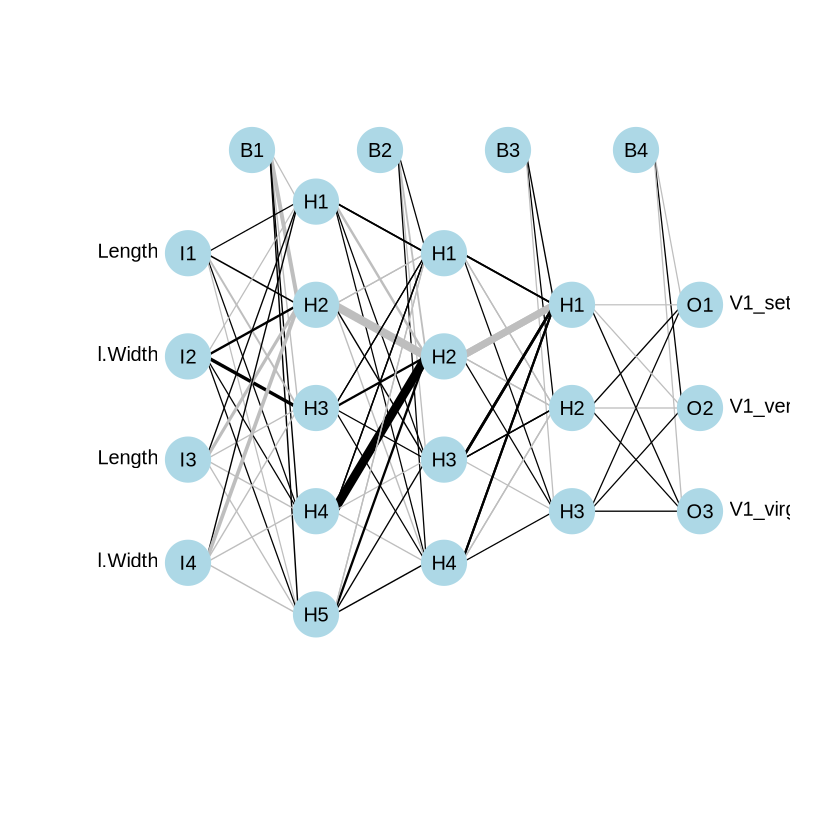

In [106]:
plotnet(modelo)


In [107]:
test <- compute(modelo, iris2_teste[, 1:4])

test$net.result


1,1.000367e+00,-0.0006713708,8.512495e-05
3,1.000215e+00,-0.0005222422,7.906019e-05
4,9.998629e-01,-0.0001775032,6.501793e-05
11,1.000426e+00,-0.0007290081,8.746909e-05
12,1.000100e+00,-0.0004098552,7.444010e-05
13,1.000189e+00,-0.0004963786,7.801879e-05
19,1.000015e+00,-0.0003264829,7.125078e-05
20,1.000295e+00,-0.0006004775,8.223245e-05
36,1.000283e+00,-0.0005887885,8.183325e-05
37,1.000415e+00,-0.0007185849,8.710129e-05
38,1.000639e+00,-0.0009380511,9.586149e-05


In [108]:
resultado <- as.data.frame(test$net.result)

resultado


,V1,V2,V3
,<dbl>,<dbl>,<dbl>
1,1.000367e+00,-0.0006713708,8.512495e-05
3,1.000215e+00,-0.0005222422,7.906019e-05
4,9.998629e-01,-0.0001775032,6.501793e-05
11,1.000426e+00,-0.0007290081,8.746909e-05
12,1.000100e+00,-0.0004098552,7.444010e-05
13,1.000189e+00,-0.0004963786,7.801879e-05
19,1.000015e+00,-0.0003264829,7.125078e-05
20,1.000295e+00,-0.0006004775,8.223245e-05
36,1.000283e+00,-0.0005887885,8.183325e-05


In [109]:
names(resultado) <- c("setosa", "versicolor", "virginica")

resultado


,setosa,versicolor,virginica
,<dbl>,<dbl>,<dbl>
1,1.000367e+00,-0.0006713708,8.512495e-05
3,1.000215e+00,-0.0005222422,7.906019e-05
4,9.998629e-01,-0.0001775032,6.501793e-05
11,1.000426e+00,-0.0007290081,8.746909e-05
12,1.000100e+00,-0.0004098552,7.444010e-05
13,1.000189e+00,-0.0004963786,7.801879e-05
19,1.000015e+00,-0.0003264829,7.125078e-05
20,1.000295e+00,-0.0006004775,8.223245e-05
36,1.000283e+00,-0.0005887885,8.183325e-05


In [110]:
resultado$class <- colnames(resultado[, 1:3])[max.col(resultado[, 1:3], ties.method = "first")]

resultado


,setosa,versicolor,virginica,class
,<dbl>,<dbl>,<dbl>,<chr>
1,1.000367e+00,-0.0006713708,8.512495e-05,setosa
3,1.000215e+00,-0.0005222422,7.906019e-05,setosa
4,9.998629e-01,-0.0001775032,6.501793e-05,setosa
11,1.000426e+00,-0.0007290081,8.746909e-05,setosa
12,1.000100e+00,-0.0004098552,7.444010e-05,setosa
13,1.000189e+00,-0.0004963786,7.801879e-05,setosa
19,1.000015e+00,-0.0003264829,7.125078e-05,setosa
20,1.000295e+00,-0.0006004775,8.223245e-05,setosa
36,1.000283e+00,-0.0005887885,8.183325e-05,setosa


In [111]:
confusao <- table(resultado$class, iris2_teste$species)

confusao


            
             setosa versicolor virginica
  setosa         14          0         0
  versicolor      0         17         2
  virginica       0          0        11

In [112]:
sum(diag(confusao)) * 100 / sum(confusao)


[1] 95.45455